In [1]:
from scipy.integrate import ode

In [49]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [259]:
g, l, k, m = [10., 2., 5., 2.]

X0 = 0
XF = 20
Y0 = [.05, 0., l, 0.]

In [261]:
def f(t, Ys):
    th, dth, x, dx = Ys
    ddth = -g/x*np.sin(th)
    ddx = x*dth**2 - k/m*(x-l) + g*np.cos(th)
    return np.array([dth, ddth, dx, ddx])

In [ ]:
# Spring
def f(t, Ys):
    th, dth, x, dx = Ys
    ddth = 0
    dth = 0
    ddx = - k/m*(x-l) + g
    return np.array([dth, ddth, dx, ddx])

In [252]:
# Pendulum
def f(t, Ys):
    th, dth, x, dx = Ys
    ddth = -g/l*np.sin(th)
    ddx = 0
    dx = 0
    return np.array([dth, ddth, dx, ddx])

In [262]:
def solve(f, with_h = 1.):
    r = ode(f)
    r.set_initial_value(Y0, X0)

    dt = with_h
    Xs = []
    Ys = []
    
    max_iter = 1e6
    while r.successful() and r.t < XF and max_iter > 0:
        r.integrate(r.t + dt)
        Xs.append(r.t)
        Ys.append(r.y)
        max_iter -= 1
    return Xs, Ys

In [263]:
Xs, Ys = solve(f, with_h = 1e-4)

In [264]:
def plot_trajectory(Ys):
    ths = array(Ys)[:, 0]
    ls = array(Ys)[:, 3]
    Xs = (l+ls)*np.sin(ths)
    Ys = -1.*(l+ls)*np.cos(ths)
    plot(Xs, Ys)

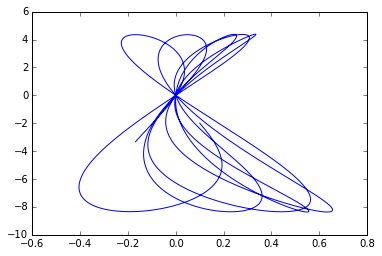

In [265]:
plot_trajectory(Ys)

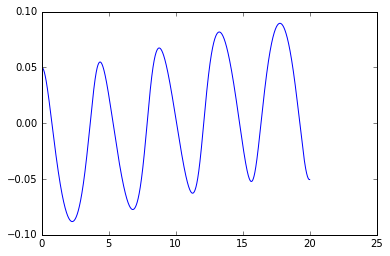

In [266]:
plot(Xs, array(Ys)[:, 0])

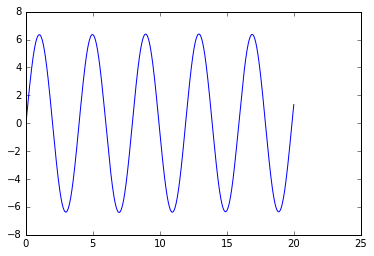

In [267]:
plot(Xs, array(Ys)[:, 3])